# Setup and data preprocessing

In [ ]:
%python -c "import torch; print(torch.__version__)"

1.11.0+cu113


In [ ]:
try:
    import torch_geometric
except:
    import torch
    
    CUDA = "cu113"
    TORCH = "1.11.0"

In [ ]:
%pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
%pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.11.0+cu113.html

%pip install torch-cluster -f https://data.pyg.org/whl/torch-1.11.0+cu113.html

%pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

In [ ]:
# import libraries

import numpy as np
import pandas as pd
import torch
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from torch_geometric.data import Data

In [3]:
# read dataset

df_classes = pd.read_csv('elliptic_bitcoin_dataset/elliptic_txs_classes.csv')
df_features = pd.read_csv('elliptic_bitcoin_dataset/elliptic_txs_features.csv', header=None)
df_edgelist = pd.read_csv('elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')

In [ ]:
# reformat classes 0:licit, 1:illicit, 2:unknow

df_classes['class'] = df_classes['class'].map({'unknown': 2, '1':1, '2':0})
df_classes.head()

,txId,class
0,230425980,2
1,5530458,2
2,232022460,2
3,232438397,0
4,230460314,2


In [ ]:
y = torch.from_numpy(df_classes['class'].values)
print(y)

tensor([2, 2, 2,  ..., 1, 2, 2])


In [ ]:
# renaming columns

df_features.columns = ['txId', 'time_step'] + [f'trans_feat_{i}' for i in range(93)] + [f'agg_feat_{i}' for i in range(72)]
df_features.head()

,txId,time_step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [ ]:
df_local_features = df_features.iloc[:,:95]
df_local_features.head()

,txId,time_step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,trans_feat_83,trans_feat_84,trans_feat_85,trans_feat_86,trans_feat_87,trans_feat_88,trans_feat_89,trans_feat_90,trans_feat_91,trans_feat_92
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.255111,-0.259194,1.125590,1.128038,-0.293773,-0.159732,0.034039,-0.183816,1.135523,1.135279
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,-0.255168,-0.259251,-0.187191,-0.185274,-0.293692,-0.760700,-0.692777,-0.719789,-1.084907,-1.084845
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,-0.254373,-0.258387,-1.499972,-1.498585,-0.021809,1.936814,2.448785,1.775108,-1.084907,-1.084845
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.255168,0.717108,-0.187191,-0.185274,3.991587,0.810879,-0.694235,2.084651,0.025308,0.025217
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.255162,-0.259249,-0.696206,-0.714093,-0.293897,-0.761399,-0.693922,-0.720790,-0.487315,-0.563089


In [ ]:
# all features

x= torch.from_numpy(df_features.iloc[:, 2:].values).to(torch.float) #excluding time step
print(x.shape)

torch.Size([203769, 165])


In [ ]:
# local features

x_local = torch.from_numpy(df_local_features.iloc[:, 2:].values).to(torch.float) #excluding time step
print(x_local.shape)

torch.Size([203769, 93])


In [ ]:
# transform edgelist to edge_index in COO format

mapping = {idx: i for i, idx in enumerate(df_features['txId'].values)}
df_edgelist['txId1'] = df_edgelist['txId1'].map(mapping)
df_edgelist['txId2'] = df_edgelist['txId2'].map(mapping)
edge_index = torch.from_numpy(df_edgelist.values).t().contiguous()
print(edge_index.shape)

torch.Size([2, 234355])


In [ ]:
# create train and test mask

time_step = torch.from_numpy(df_features['time_step'].values)
train_mask = (time_step < 35) & (y != 2)
test_mask = (time_step >= 35) & (y != 2)

In [ ]:
print(train_mask.unique(return_counts=True))
print(test_mask.unique(return_counts=True))

(tensor([False,  True]), tensor([173875,  29894]))
(tensor([False,  True]), tensor([187099,  16670]))


In [ ]:
# load data into data object

data = Data(x=x, edge_index=edge_index, y=y, train_mask=train_mask,
                    test_mask=test_mask)

num_features = x.shape[1]
num_classes= len(y[test_mask].unique())

In [ ]:
# data overview

print(data)
print('===========================================================================================================')
print(f'Number of features: {num_features}')
print(f'Number of classes: {num_classes}')
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[203769, 165], edge_index=[2, 234355], y=[203769], train_mask=[203769], test_mask=[203769])
Number of features: 165
Number of classes: 2
Number of nodes: 203769
Number of edges: 234355
Number of training nodes: 29894
Training node label rate: 0.15
Has isolated nodes: False
Has self-loops: False
Is undirected: False


In [ ]:
df_class_features = pd.merge(df_classes, df_features)
df_class_features.head()

,txId,class,time_step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,230425980,2,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,2,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,2,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,0,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,2,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [ ]:
# create data object with local features only

data_local = Data(x=x_local, edge_index=edge_index, y=y, train_mask=train_mask,
                    test_mask=test_mask)

num_features_local = x_local.shape[1]
num_classes= len(y[test_mask].unique())

In [ ]:
df_class_local_features = pd.merge(df_classes, df_local_features)
df_class_local_features.head()

,txId,class,time_step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,...,trans_feat_83,trans_feat_84,trans_feat_85,trans_feat_86,trans_feat_87,trans_feat_88,trans_feat_89,trans_feat_90,trans_feat_91,trans_feat_92
0,230425980,2,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.255111,-0.259194,1.125590,1.128038,-0.293773,-0.159732,0.034039,-0.183816,1.135523,1.135279
1,5530458,2,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.255168,-0.259251,-0.187191,-0.185274,-0.293692,-0.760700,-0.692777,-0.719789,-1.084907,-1.084845
2,232022460,2,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,...,-0.254373,-0.258387,-1.499972,-1.498585,-0.021809,1.936814,2.448785,1.775108,-1.084907,-1.084845
3,232438397,0,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,...,-0.255168,0.717108,-0.187191,-0.185274,3.991587,0.810879,-0.694235,2.084651,0.025308,0.025217
4,230460314,2,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,...,-0.255162,-0.259249,-0.696206,-0.714093,-0.293897,-0.761399,-0.693922,-0.720790,-0.487315,-0.563089


# Data Analysis

In [ ]:
# class distribution

df_classes['class'].value_counts()

2    157205
0     42019
1      4545
Name: class, dtype: int64

<BarContainer object of 3 artists>

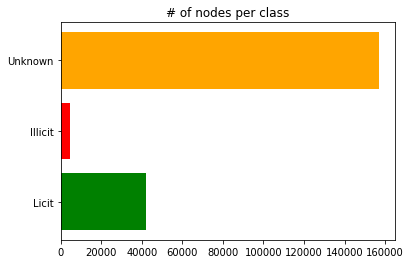

In [ ]:
# class distribution plot

group_class = df_classes.groupby('class').count()
plt.title("# of nodes per class")
plt.barh([ 'Licit','Illicit', 'Unknown'], group_class['txId'].values, color=['g', 'r', 'orange'] )

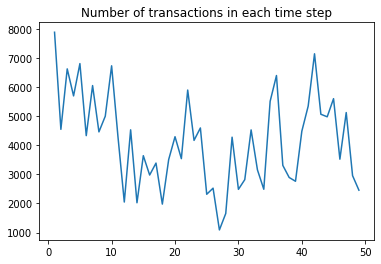

In [ ]:
# number of transactions in each time step

df_features['time_step'].value_counts().sort_index().plot();
plt.title('Number of transactions in each time step');

In [ ]:
# train set info

print(data.x[train_mask].shape)
print(data.y[train_mask].shape)
print(pd.DataFrame(data.y[train_mask]).value_counts())

torch.Size([29894, 165])
torch.Size([29894])
0    26432
1     3462
dtype: int64


In [ ]:
# test set info

print(data.x[test_mask].shape)
print(data.y[test_mask].shape)
print(pd.DataFrame(data.y[test_mask]).value_counts())

torch.Size([16670, 165])
torch.Size([16670])
0    15587
1     1083
dtype: int64


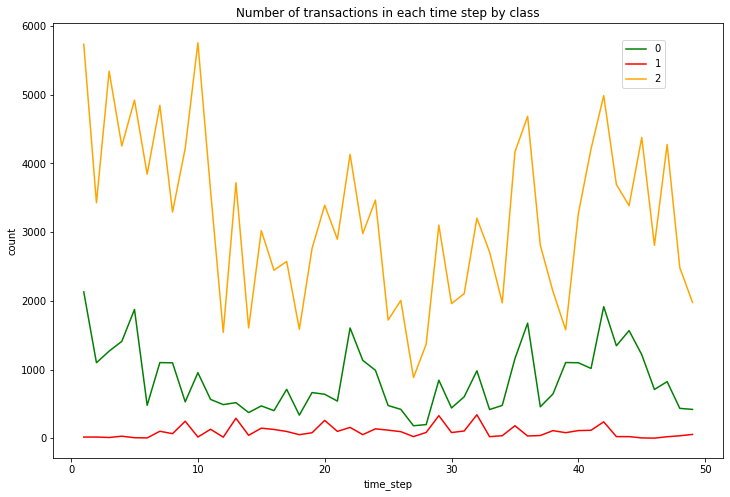

In [ ]:
# number of transactions in each time step by class

plt.figure(figsize=(12, 8))
grouped = df_class_features.groupby(['time_step', 'class'])['txId'].count().reset_index().rename(columns={'txId': 'count'})
sns.lineplot(x='time_step', y='count', hue='class', palette=['g','r','orange'], data=grouped);
plt.legend(loc=(0.85, 0.85));
plt.title('Number of transactions in each time step by class');

In [ ]:
# degree analysis

edge_pairs_list = list(df_edgelist.to_records(index=False))
G = nx.from_edgelist(edge_pairs_list)
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
print("Average node degree:", np.mean(degree_sequence))

# Logistic Regression

## LR (all features)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

In [ ]:
cond1 = df_class_features['class'] != 2
cond2 = df_class_features['time_step'] < 35
cond3 = df_class_features['time_step'] >= 35
my_training_mask = cond1 & cond2
my_test_mask = cond1 & cond3
print(my_training_mask.value_counts())

In [ ]:
X = df_class_features.drop(columns=['txId', 'class', 'time_step']) # drop class, text id and time step
print(X.head())
y = df_class_features[['class']]
print(y.head())

In [ ]:
X_train = X[my_training_mask]
print(X_train.head())
y_train = y[my_training_mask]
print(y_train.head())
X_test = X[my_test_mask]
print(X_test.head())
y_test = y[my_test_mask]
print(y_test.value_counts())

In [ ]:
model_LR = LogisticRegression().fit(X_train.values,y_train.values)

y_probabilities = model_LR.predict_proba(X_test.values)
y_probabilities = np.array(y_probabilities)[:,1:]

y_preds = model_LR.predict(X_test.values)


test_precision = precision_score(y_test, y_preds, pos_label=1)
test_recall = recall_score(y_test, y_preds, pos_label=1)
test_f1 = f1_score(y_test, y_preds, pos_label=1)
test_average_precision = average_precision_score(y_test, y_probabilities)

print("Logistic Regression Classifier")
print("Precision:%.4f \nRecall:%.4f \nF1 Score:%.4f \nAverage Precision:%.4f"%(test_precision, test_recall, test_f1, test_average_precision))

## LR (local features)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

In [ ]:
cond1 = df_class_local_features['class'] != 2
cond2 = df_class_local_features['time_step'] < 35
cond3 = df_class_local_features['time_step'] >= 35
my_training_mask = cond1 & cond2
my_test_mask = cond1 & cond3
print(my_training_mask.value_counts())

In [ ]:
X = df_class_local_features.drop(columns=['txId', 'class', 'time_step']) # drop class, text id and time step
print(X.head())
y = df_class_local_features[['class']]
print(y.head())

In [ ]:
X_train = X[my_training_mask]
print(X_train.head())
y_train = y[my_training_mask]
print(y_train.head())
X_test = X[my_test_mask]
print(X_test.head())
y_test = y[my_test_mask]
print(y_test.value_counts())

In [ ]:
model_LR = LogisticRegression().fit(X_train.values,y_train.values)

y_probabilities = model_LR.predict_proba(X_test.values)
y_probabilities = np.array(y_probabilities)[:,1:]

y_preds = model_LR.predict(X_test.values)


test_precision = precision_score(y_test, y_preds, pos_label=1)
test_recall = recall_score(y_test, y_preds, pos_label=1)
test_f1 = f1_score(y_test, y_preds, pos_label=1)
test_average_precision = average_precision_score(y_test, y_probabilities)

print("Logistic Regression Classifier")
print("Precision:%.4f \nRecall:%.4f \nF1 Score:%.4f \nAverage Precision:%.4f"%(test_precision, test_recall, test_f1, test_average_precision))

# Random Forest

## RF (all features)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

In [ ]:
cond1 = df_class_features['class'] != 2
cond2 = df_class_features['time_step'] < 35
cond3 = df_class_features['time_step'] >= 35
my_training_mask = cond1 & cond2
my_test_mask = cond1 & cond3
print(my_training_mask.value_counts())

In [ ]:
X = df_class_features.drop(columns=['txId', 'class', 'time_step']) # drop class, text id and time step
print(X.head())
y = df_class_features[['class']]
print(y.head())

In [ ]:
X_train = X[my_training_mask]
print(X_train.head())
y_train = y[my_training_mask]
print(y_train.head())
X_test = X[my_test_mask]
print(X_test.head())
y_test = y[my_test_mask]
print(y_test.head())

In [ ]:
model_RF = RandomForestClassifier(n_estimators=50, max_features=50).fit(X_train.values,y_train.values)

y_probabilities = model_RF.predict_proba(X_test.values)
y_probabilities = np.array(y_probabilities)[:,1:]

y_preds = model_RF.predict(X_test.values)

test_precision = precision_score(y_test, y_preds, pos_label=1)
test_recall = recall_score(y_test, y_preds, pos_label=1)
test_f1 = f1_score(y_test, y_preds, pos_label=1)
test_average_precision = average_precision_score(y_test, y_probabilities)

print("Random Forest Classifier")
print("Precision:%.4f \nRecall:%.4f \nF1 Score:%.4f \nAverage Precision:%.4f"%(test_precision, test_recall, test_f1, test_average_precision))

## RF (local features)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

In [ ]:
cond1 = df_class_local_features['class'] != 2
cond2 = df_class_local_features['time_step'] < 35
cond3 = df_class_local_features['time_step'] >= 35
my_training_mask = cond1 & cond2
my_test_mask = cond1 & cond3
print(my_training_mask.value_counts())

In [ ]:
X = df_class_local_features.drop(columns=['txId', 'class', 'time_step']) # drop class, text id and time step
print(X.head())
y = df_class_local_features[['class']]
print(y.head())

In [ ]:
X_train = X[my_training_mask]
print(X_train.head())
y_train = y[my_training_mask]
print(y_train.head())
X_test = X[my_test_mask]
print(X_test.head())
y_test = y[my_test_mask]
print(y_test.head())

In [ ]:
model_RF = RandomForestClassifier(n_estimators=50, max_features=50).fit(X_train.values,y_train.values)

y_probabilities = model_RF.predict_proba(X_test.values)
y_probabilities = np.array(y_probabilities)[:,1:]

y_preds = model_RF.predict(X_test.values)

test_precision = precision_score(y_test, y_preds, pos_label=1)
test_recall = recall_score(y_test, y_preds, pos_label=1)
test_f1 = f1_score(y_test, y_preds, pos_label=1)
test_average_precision = average_precision_score(y_test, y_probabilities)

print("Random Forest Classifier")
print("Precision:%.4f \nRecall:%.4f \nF1 Score:%.4f \nAverage Precision:%.4f"%(test_precision, test_recall, test_f1, test_average_precision))

# Multilayer Perceptron

## MLP (all features)

In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.lin1 = Linear(num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=50)
print(model)

In [ ]:
print(data.y[train_mask].unique(return_counts=True))

In [ ]:
model = MLP(hidden_channels=50)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x)  # Perform a single forward pass.
      loss = criterion(out[train_mask], data.y[train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

In [ ]:
def test():
      model.eval()
      out = model(data.x)
      probabilities = out.detach().cpu().numpy()[:,1:]
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      print(pd.DataFrame(pred[test_mask]).value_counts())
      test_correct = pred[test_mask] == data.y[test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(test_mask.sum())  # Derive ratio of correct predictions.
      test_precision = precision_score(data.y[test_mask], pred[test_mask])
      test_recall = recall_score(data.y[test_mask], pred[test_mask])
      test_f1 = f1_score(data.y[test_mask], pred[test_mask])
      test_average_precision = average_precision_score(data.y[test_mask], probabilities[test_mask])

      test_results = {
          1: test_acc,
          2: test_precision,
          3: test_recall,
          4: test_f1,
          5: test_average_precision
      }
      return test_results

In [ ]:
test_results = test()
print(f'Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]:.4f}, Test Recall: {test_results[3]:.4f}, Test F1: {test_results[4]:.4f}, Test Average Precision: {test_results[5]:.4f}')

## MLP (local features)

In [ ]:
from torch.nn import Linear
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.lin1 = Linear(93, hidden_channels)
        self.lin2 = Linear(hidden_channels, num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=50)
print(model)

In [ ]:
local_features_x = torch.from_numpy(df_local_features.iloc[:, 2:].values).to(torch.float) #excluding time step
print(local_features_x.shape)

In [ ]:
model = MLP(hidden_channels=50)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)  # Define optimizer.

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(local_features_x)  # Perform a single forward pass.
      loss = criterion(out[train_mask], data.y[train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

In [ ]:
def test():
      model.eval()
      out = model(local_features_x)
      probabilities = out.detach().cpu().numpy()[:,1:]
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      print(pd.DataFrame(pred[test_mask]).value_counts())
      test_correct = pred[test_mask] == data.y[test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(test_mask.sum())  # Derive ratio of correct predictions.
      test_precision = precision_score(data.y[test_mask], pred[test_mask])
      test_recall = recall_score(data.y[test_mask], pred[test_mask])
      test_f1 = f1_score(data.y[test_mask], pred[test_mask])
      test_average_precision = average_precision_score(data.y[test_mask], probabilities[test_mask])

      test_results = {
          1: test_acc,
          2: test_precision,
          3: test_recall,
          4: test_f1,
          5: test_average_precision
      }
      return test_results

In [ ]:
test_results = test()
print(f'Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]:.4f}, Test Recall: {test_results[3]:.4f}, Test F1: {test_results[4]:.4f}, Test Average Precision: {test_results[5]:.4f}')

# Graph Convolutional Network

## GCN (all features)

In [ ]:
from torch_geometric.nn import GCNConv
from torch.nn import Linear
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(165, 128)
        self.conv2 = GCNConv(128, 2)
        self.classifier = Linear(2, 1)

    def forward(self, data, adj=None):
        x, edge_index = data.x, data.edge_index
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.conv2(h, edge_index)
        embeddings = h # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(embeddings)

        # return out, embeddings
        return torch.sigmoid(out)

model = GCN()
print(model)

In [ ]:
print(torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GCN()

model.to(device)

data = data.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
criterion = torch.nn.BCELoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data)  # Perform a single forward pass.
      out = out.reshape((data.x.shape[0]))
      loss = criterion(out[train_mask], data.y[train_mask].float())  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss


for epoch in range(501):
    loss = train()
    if epoch % 5 == 0:
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  average_precision_score


def test(threshold=0.5):
      model.eval()
      out = model(data)
      out = out.reshape((data.x.shape[0]))
      
      pred_scores = out.detach().cpu().numpy()[test_mask]
      pred_labels = pred_scores > threshold

      print(np.unique(pred_labels, return_counts=True))

      original_data = data.detach().cpu()
      target_labels = original_data.y[test_mask]

      test_accuracy = accuracy_score(target_labels, pred_labels)
      test_precision = precision_score(target_labels, pred_labels)
      test_recall = recall_score(target_labels, pred_labels)
      test_f1 = f1_score(target_labels, pred_labels)
      test_average_precision = average_precision_score(target_labels, pred_scores)
      test_results = {
          1: test_accuracy,
          2: test_precision,
          3: test_recall,
          4: test_f1,
          5: test_average_precision
      }
      return test_results

In [ ]:
test_results = test(threshold=0.5)
print(f'Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]:.4f}, Test Recall: {test_results[3]:.4f}, Test F1: {test_results[4]:.4f}, Test Average Precision: {test_results[5]: .4f}')

## GCN (local features)

In [ ]:
from torch_geometric.nn import GCNConv
from torch.nn import Linear
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(93, 32)
        self.conv2 = GCNConv(32, 2)
        self.classifier = Linear(2, 1)

    def forward(self, data, adj=None):
        x, edge_index = data.x, data.edge_index
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.conv2(h, edge_index)
        embeddings = h # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(embeddings)

        # return out, embeddings
        return torch.sigmoid(out)

model = GCN()
print(model)

In [ ]:
print(torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GCN()

model.to(device)

local_data = data_local.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
criterion = torch.nn.BCELoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(local_data)  # Perform a single forward pass.
      out = out.reshape((local_data.x.shape[0]))
      loss = criterion(out[train_mask], local_data.y[train_mask].float())  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss


for epoch in range(501):
    loss = train()
    if epoch % 5 == 0:
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score


def test(threshold=0.5):
      model.eval()
      out = model(local_data)
      out = out.reshape((local_data.x.shape[0]))
      
      pred_scores = out.detach().cpu().numpy()[test_mask]
      pred_labels = pred_scores > threshold

      print(np.unique(pred_labels, return_counts=True))

      original_data = local_data.detach().cpu()
      target_labels = original_data.y[test_mask]

      test_accuracy = accuracy_score(target_labels, pred_labels)
      test_precision = precision_score(target_labels, pred_labels)
      test_recall = recall_score(target_labels, pred_labels)
      test_f1 = f1_score(target_labels, pred_labels)
      test_average_precision = average_precision_score(target_labels, pred_scores)
      test_results = {
          1: test_accuracy,
          2: test_precision,
          3: test_recall,
          4: test_f1,
          5: test_average_precision
      }
      return test_results

In [ ]:
test_results = test(threshold=0.5)
print(f'Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]:.4f}, Test Recall: {test_results[3]:.4f}, Test F1: {test_results[4]:.4f}, Test Average Precision: {test_results[5]: .4f}')

# Graph Attention Network



## GAT (all features)

In [ ]:
import torch.nn as nn
from torch.nn import Linear, LayerNorm, ReLU, Dropout
import torch.nn.functional as F
from torch_geometric.nn import GATConv


class GAT(torch.nn.Module):
    def __init__(self, hidden_dim, args):
        super(GAT, self).__init__()
        # use GAT message passing 
        self.conv1 = GATConv(num_features, hidden_dim, heads=args['heads'])
        self.conv2 = GATConv(args['heads'] * hidden_dim, num_classes, heads=args['heads'])
        self.classifier = Linear(4, 1)
        
    def forward(self, x, edge_index, adj=None):
        # Layer 1
        x = self.conv1(x, edge_index)
        x = F.dropout(F.relu(x), p=args['dropout'], training=self.training)
        # Layer 2
        x = self.conv2(x, edge_index)
        x = F.dropout(F.relu(x), p=args['dropout'], training=self.training)
        # MLP output
        x = self.classifier(x)

        return torch.sigmoid(x)

In [ ]:
args={"epochs":500,
      'lr':0.01,
      'weight_decay':1e-5,
      'heads':2,
      'hidden_dim': 128, 
      'dropout': 0.5
      }

print(torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
      
model = GAT(args['hidden_dim'], args)
print(model)


In [ ]:
model = GAT(args['hidden_dim'], args)
model.to(device)

data = data.to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
criterion = torch.nn.BCELoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      out = out.reshape((data.x.shape[0]))
      loss = criterion(out[train_mask], data.y[train_mask].float())  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss


for epoch in range(args["epochs"]+1):
    loss = train()
    if epoch % 5 == 0:
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score


def test(threshold=0.5):
      model.eval()
      out = model(data.x, data.edge_index)
      out = out.reshape((data.x.shape[0]))
      
      pred_scores = out.detach().cpu().numpy()[test_mask]
      pred_labels = pred_scores > threshold

      original_data = data.detach().cpu()
      target_labels = original_data.y[test_mask]

      test_accuracy = accuracy_score(target_labels, pred_labels)
      test_precision = precision_score(target_labels, pred_labels)
      test_recall = recall_score(target_labels, pred_labels)
      test_f1 = f1_score(target_labels, pred_labels)
      test_average_precision = average_precision_score(target_labels, pred_scores)

      test_results = {
          1: test_accuracy,
          2: test_precision,
          3: test_recall,
          4: test_f1,
          5: test_average_precision
      }
      return test_results

In [ ]:
test_results = test(threshold=0.5)
print(f'Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]:.4f}, Test Recall: {test_results[3]:.4f}, Test F1: {test_results[4]:.4f}, Test Average Precision: {test_results[5]: .4f}')

## GAT (local features)

In [ ]:
import torch.nn as nn
from torch.nn import Linear, LayerNorm, ReLU, Dropout
import torch.nn.functional as F
from torch_geometric.nn import GATConv


class GAT(torch.nn.Module):
    def __init__(self, hidden_dim, args):
        super(GAT, self).__init__()
        # use GAT message passing 
        self.conv1 = GATConv(num_features_local, hidden_dim, heads=args['heads'])
        self.conv2 = GATConv(args['heads'] * hidden_dim, num_classes, heads=args['heads'])
        self.classifier = Linear(4, 1)
        
    def forward(self, x, edge_index, adj=None):
        # Layer 1
        x = self.conv1(x, edge_index)
        x = F.dropout(F.relu(x), p=args['dropout'], training=self.training)
        # Layer 2
        x = self.conv2(x, edge_index)
        x = F.dropout(F.relu(x), p=args['dropout'], training=self.training)
        # MLP output
        x = self.classifier(x)

        return torch.sigmoid(x)

In [ ]:
args={"epochs":500,
      'lr':0.01,
      'weight_decay':1e-5,
      'heads':2,
      'hidden_dim': 32, 
      'dropout': 0.5
      }

print(torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
      
model = GAT(args['hidden_dim'], args)
print(model)


In [ ]:
model = GAT(args['hidden_dim'], args)
model.to(device)

local_data = data_local.to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'], weight_decay=args['weight_decay'])
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
criterion = torch.nn.BCELoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(local_data.x, local_data.edge_index)  # Perform a single forward pass.
      out = out.reshape((local_data.x.shape[0]))
      loss = criterion(out[train_mask], local_data.y[train_mask].float())  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss


for epoch in range(args["epochs"]+1):
    loss = train()
    if epoch % 5 == 0:
      print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score


def test(threshold=0.5):
      model.eval()
      out = model(local_data.x, local_data.edge_index)
      out = out.reshape((local_data.x.shape[0]))
      
      pred_scores = out.detach().cpu().numpy()[test_mask]
      pred_labels = pred_scores > threshold

      original_data = local_data.detach().cpu()
      target_labels = original_data.y[test_mask]

      test_accuracy = accuracy_score(target_labels, pred_labels)
      test_precision = precision_score(target_labels, pred_labels)
      test_recall = recall_score(target_labels, pred_labels)
      test_f1 = f1_score(target_labels, pred_labels)
      test_average_precision = average_precision_score(target_labels, pred_scores)

      test_results = {
          1: test_accuracy,
          2: test_precision,
          3: test_recall,
          4: test_f1,
          5: test_average_precision
      }
      return test_results

In [ ]:
test_results = test(threshold=0.5)
print(f'Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]:.4f}, Test Recall: {test_results[3]:.4f}, Test F1: {test_results[4]:.4f}, Test Average Precision: {test_results[5]: .4f}')

# GraphSAGE (inductive)

## GraphSAGE (all features)

In [ ]:
import copy

import torch.nn as nn
from torch_geometric.nn import SAGEConv
from torch.nn import Linear
import torch.nn.functional as F

from torch_geometric.loader import NeighborLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device, 'x', 'y')

train_loader = NeighborLoader(
    data,
    # Sample all neighbors for each node for 2 iterations
    num_neighbors=[-1, -1],
    # Use a batch size of 128 for sampling training nodes
    batch_size=128,
    input_nodes=data.train_mask,
    shuffle=True
)

subgraph_loader = NeighborLoader(copy.copy(data), input_nodes=None,
                                 num_neighbors=[-1], batch_size=128, shuffle=False)

In [ ]:
for s in train_loader:
  print(s)
  break

# No need to maintain these features during evaluation:
del subgraph_loader.data.x, subgraph_loader.data.y
# Add global node index information.
subgraph_loader.data.num_nodes = data.num_nodes
subgraph_loader.data.n_id = torch.arange(data.num_nodes)

In [ ]:
from tqdm import tqdm

class SAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.convs = torch.nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden_channels))
        self.convs.append(SAGEConv(hidden_channels, out_channels))


    def forward(self, x, edge_index):
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            if i < len(self.convs) - 1:
                x = x.relu_()
                x = F.dropout(x, p=0.5, training=self.training)
        return x

    @torch.no_grad()
    def inference(self, x_all, subgraph_loader):
        pbar = tqdm(total=len(subgraph_loader.dataset) * len(self.convs))
        pbar.set_description('Evaluating')

        # Compute representations of nodes layer by layer, using *all*
        # available edges. This leads to faster computation in contrast to
        # immediately computing the final representations of each batch:
        for i, conv in enumerate(self.convs):
            xs = []
            for batch in subgraph_loader:
                x = x_all[batch.n_id.to(x_all.device)].to(device)
                x = conv(x, batch.edge_index.to(device))
                if i < len(self.convs) - 1:
                    x = x.relu_()
                xs.append(x[:batch.batch_size].cpu())
                pbar.update(batch.batch_size)
            x_all = torch.cat(xs, dim=0)
        pbar.close()
        return x_all


model = SAGE(num_features, 100, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

print(model)

In [ ]:
def train(epoch):
    model.train()

    pbar = tqdm(total=int(len(train_loader.dataset)))
    pbar.set_description(f'Epoch {epoch:02d}')

    total_loss = total_correct = total_examples = 0
    for batch in train_loader:
        optimizer.zero_grad()
        y = batch.y[:batch.batch_size]
        y_hat = model(batch.x, batch.edge_index.to(device))[:batch.batch_size]
        loss = criterion(y_hat,y)
        loss.backward()
        optimizer.step()

        total_loss += float(loss) * batch.batch_size
        total_examples += batch.batch_size
        pbar.update(batch.batch_size)
    pbar.close()

    return total_loss / total_examples


for epoch in range(1, 51):
    loss= train(epoch)
    print(f'Epoch {epoch:02d}, Loss: {loss:.4f}')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score

@torch.no_grad()
def test():
    model.eval()
    out = model.inference(data.x, subgraph_loader)
    y_hat = out.argmax(dim=-1)
    y = data.y.to(y_hat.device)

    test_acc = int((y_hat[test_mask] == y[test_mask]).sum()) / int(test_mask.sum())

    pred_scores = out[:,1][test_mask]
    target_labels = y[test_mask]
    pred_labels = y_hat[test_mask]

    test_accuracy = accuracy_score(target_labels, pred_labels)
    test_precision = precision_score(target_labels, pred_labels)
    test_recall = recall_score(target_labels, pred_labels)
    test_f1 = f1_score(target_labels, pred_labels)
    test_average_precision = average_precision_score(target_labels, pred_scores)
    test_results = {
          1: test_accuracy,
          2: test_precision,
          3: test_recall,
          4: test_f1,
          5: test_average_precision
    }
    return test_results

In [ ]:
test_results = test()
print(f'Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]:.4f}, Test Recall: {test_results[3]:.4f}, Test F1: {test_results[4]:.4f}, Test AP: {test_results[5]:.4f}')

## GraphSAGE (local features)

In [ ]:
import copy

import torch.nn as nn
from torch_geometric.nn import SAGEConv
from torch.nn import Linear
import torch.nn.functional as F

from torch_geometric.loader import NeighborLoader


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
local_data = data_local.to(device, 'x', 'y')

train_loader = NeighborLoader(
    local_data,
    # Sample all neighbors for each node for 2 iterations
    num_neighbors=[-1, -1],
    # Use a batch size of 128 for sampling training nodes
    batch_size=128,
    input_nodes=local_data.train_mask,
    shuffle=True
)

subgraph_loader = NeighborLoader(copy.copy(local_data), input_nodes=None,
                                 num_neighbors=[-1], batch_size=128, shuffle=False)

In [ ]:
for s in train_loader:
  print(s)
  break

# No need to maintain these features during evaluation:
del subgraph_loader.data.x, subgraph_loader.data.y
# Add global node index information.
subgraph_loader.data.num_nodes = data.num_nodes
subgraph_loader.data.n_id = torch.arange(data.num_nodes)

In [ ]:
from tqdm import tqdm

class SAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.convs = torch.nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden_channels))
        self.convs.append(SAGEConv(hidden_channels, out_channels))


    def forward(self, x, edge_index):
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            if i < len(self.convs) - 1:
                x = x.relu_()
                x = F.dropout(x, p=0.5, training=self.training)
        return x

    @torch.no_grad()
    def inference(self, x_all, subgraph_loader):
        pbar = tqdm(total=len(subgraph_loader.dataset) * len(self.convs))
        pbar.set_description('Evaluating')

        # Compute representations of nodes layer by layer, using *all*
        # available edges. This leads to faster computation in contrast to
        # immediately computing the final representations of each batch:
        for i, conv in enumerate(self.convs):
            xs = []
            for batch in subgraph_loader:
                x = x_all[batch.n_id.to(x_all.device)].to(device)
                x = conv(x, batch.edge_index.to(device))
                if i < len(self.convs) - 1:
                    x = x.relu_()
                xs.append(x[:batch.batch_size].cpu())
                pbar.update(batch.batch_size)
            x_all = torch.cat(xs, dim=0)
        pbar.close()
        return x_all


model = SAGE(num_features_local, 32, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

print(model)

In [ ]:
def train(epoch):
    model.train()

    pbar = tqdm(total=int(len(train_loader.dataset)))
    pbar.set_description(f'Epoch {epoch:02d}')

    total_loss = total_correct = total_examples = 0
    for batch in train_loader:
        optimizer.zero_grad()
        y = batch.y[:batch.batch_size]
        y_hat = model(batch.x, batch.edge_index.to(device))[:batch.batch_size]
        loss = criterion(y_hat,y)
        loss.backward()
        optimizer.step()

        total_loss += float(loss) * batch.batch_size
        total_examples += batch.batch_size
        pbar.update(batch.batch_size)
    pbar.close()

    return total_loss / total_examples


for epoch in range(1, 51):
    loss= train(epoch)
    print(f'Epoch {epoch:02d}, Loss: {loss:.4f}')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score

@torch.no_grad()
def test():
    model.eval()
    out = model.inference(local_data.x, subgraph_loader)
    y_hat = out.argmax(dim=-1)
    y = local_data.y.to(y_hat.device)

    test_acc = int((y_hat[test_mask] == y[test_mask]).sum()) / int(test_mask.sum())

    pred_scores = out[:,1][test_mask]
    target_labels = y[test_mask]
    pred_labels = y_hat[test_mask]

    test_accuracy = accuracy_score(target_labels, pred_labels)
    test_precision = precision_score(target_labels, pred_labels)
    test_recall = recall_score(target_labels, pred_labels)
    test_f1 = f1_score(target_labels, pred_labels)
    test_average_precision = average_precision_score(target_labels, pred_scores)
    test_results = {
          1: test_accuracy,
          2: test_precision,
          3: test_recall,
          4: test_f1,
          5: test_average_precision
    }
    return test_results

In [ ]:
test_results = test()
print(f'Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]:.4f}, Test Recall: {test_results[3]:.4f}, Test F1: {test_results[4]:.4f}, Test AP: {test_results[5]:.4f}')

## GraphSAGE (weighted loss)

In [ ]:
import copy

import torch.nn as nn
from torch_geometric.nn import SAGEConv
from torch.nn import Linear
import torch.nn.functional as F

from torch_geometric.loader import NeighborLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device, 'x', 'y')

train_loader = NeighborLoader(
    data,
    # Sample all neighbors for each node for 2 iterations
    num_neighbors=[-1, -1],
    # Use a batch size of 128 for sampling training nodes
    batch_size=128,
    input_nodes=data.train_mask,
    shuffle=True
)

subgraph_loader = NeighborLoader(copy.copy(data), input_nodes=None,
                                 num_neighbors=[-1], batch_size=128, shuffle=False)

In [ ]:
for s in train_loader:
  print(s)
  break

# No need to maintain these features during evaluation:
del subgraph_loader.data.x, subgraph_loader.data.y
# Add global node index information.
subgraph_loader.data.num_nodes = data.num_nodes
subgraph_loader.data.n_id = torch.arange(data.num_nodes)

In [ ]:
from tqdm import tqdm

class SAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.convs = torch.nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden_channels))
        self.convs.append(SAGEConv(hidden_channels, out_channels))


    def forward(self, x, edge_index):
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            if i < len(self.convs) - 1:
                x = x.relu_()
                x = F.dropout(x, p=0.5, training=self.training)
        return x

    @torch.no_grad()
    def inference(self, x_all, subgraph_loader):
        pbar = tqdm(total=len(subgraph_loader.dataset) * len(self.convs))
        pbar.set_description('Evaluating')

        # Compute representations of nodes layer by layer, using *all*
        # available edges. This leads to faster computation in contrast to
        # immediately computing the final representations of each batch:
        for i, conv in enumerate(self.convs):
            xs = []
            for batch in subgraph_loader:
                x = x_all[batch.n_id.to(x_all.device)].to(device)
                x = conv(x, batch.edge_index.to(device))
                if i < len(self.convs) - 1:
                    x = x.relu_()
                xs.append(x[:batch.batch_size].cpu())
                pbar.update(batch.batch_size)
            x_all = torch.cat(xs, dim=0)
        pbar.close()
        return x_all


model = SAGE(num_features, 100, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

weights = torch.tensor([0.3,0.7])
weights = weights.to(device)


criterion = torch.nn.CrossEntropyLoss(weight=weights)

print(model)

In [ ]:
def train(epoch):
    model.train()

    pbar = tqdm(total=int(len(train_loader.dataset)))
    pbar.set_description(f'Epoch {epoch:02d}')

    total_loss = total_correct = total_examples = 0
    for batch in train_loader:
        optimizer.zero_grad()
        y = batch.y[:batch.batch_size]
        y_hat = model(batch.x, batch.edge_index.to(device))[:batch.batch_size]
        loss = criterion(y_hat,y)
        loss.backward()
        optimizer.step()

        total_loss += float(loss) * batch.batch_size
        total_examples += batch.batch_size
        pbar.update(batch.batch_size)
    pbar.close()

    return total_loss / total_examples


for epoch in range(1, 51):
    loss= train(epoch)
    print(f'Epoch {epoch:02d}, Loss: {loss:.4f}')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score

@torch.no_grad()
def test():
    model.eval()
    out = model.inference(data.x, subgraph_loader)
    y_hat = out.argmax(dim=-1)
    y = data.y.to(y_hat.device)

    test_acc = int((y_hat[test_mask] == y[test_mask]).sum()) / int(test_mask.sum())

    pred_scores = out[:,1][test_mask]
    target_labels = y[test_mask]
    pred_labels = y_hat[test_mask]

    test_accuracy = accuracy_score(target_labels, pred_labels)
    test_precision = precision_score(target_labels, pred_labels)
    test_recall = recall_score(target_labels, pred_labels)
    test_f1 = f1_score(target_labels, pred_labels)
    test_average_precision = average_precision_score(target_labels, pred_scores)
    test_results = {
          1: test_accuracy,
          2: test_precision,
          3: test_recall,
          4: test_f1,
          5: test_average_precision
    }
    return test_results

In [ ]:
test_results = test()
print(f'Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]:.4f}, Test Recall: {test_results[3]:.4f}, Test F1: {test_results[4]:.4f}, Test AP: {test_results[5]:.4f}')

## GraphSAGE (imabalanced sampler)

In [ ]:
import copy

import torch.nn as nn
from torch_geometric.nn import SAGEConv
from torch.nn import Linear
import torch.nn.functional as F

from torch_geometric.loader import NeighborLoader, ImbalancedSampler


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device, 'x', 'y')

sampler = ImbalancedSampler(data, input_nodes=data.train_mask)

train_loader = NeighborLoader(
    data,
    # Sample all neighbors for each node for 2 iterations
    num_neighbors=[-1, -1],
    # Use a batch size of 128 for sampling training nodes
    batch_size=128,
    input_nodes=data.train_mask,
    sampler=sampler,
)

subgraph_loader = NeighborLoader(copy.copy(data), input_nodes=None,
                                 num_neighbors=[-1], batch_size=128, shuffle=False)

In [ ]:
for s in train_loader:
  print(s)
  break

# No need to maintain these features during evaluation:
del subgraph_loader.data.x, subgraph_loader.data.y
# Add global node index information.
subgraph_loader.data.num_nodes = data.num_nodes
subgraph_loader.data.n_id = torch.arange(data.num_nodes)

In [ ]:
from tqdm import tqdm

class SAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.convs = torch.nn.ModuleList()
        self.convs.append(SAGEConv(in_channels, hidden_channels))
        self.convs.append(SAGEConv(hidden_channels, out_channels))


    def forward(self, x, edge_index):
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            if i < len(self.convs) - 1:
                x = x.relu_()
                x = F.dropout(x, p=0.5, training=self.training)
        return x

    @torch.no_grad()
    def inference(self, x_all, subgraph_loader):
        pbar = tqdm(total=len(subgraph_loader.dataset) * len(self.convs))
        pbar.set_description('Evaluating')

        # Compute representations of nodes layer by layer, using *all*
        # available edges. This leads to faster computation in contrast to
        # immediately computing the final representations of each batch:
        for i, conv in enumerate(self.convs):
            xs = []
            for batch in subgraph_loader:
                x = x_all[batch.n_id.to(x_all.device)].to(device)
                x = conv(x, batch.edge_index.to(device))
                if i < len(self.convs) - 1:
                    x = x.relu_()
                xs.append(x[:batch.batch_size].cpu())
                pbar.update(batch.batch_size)
            x_all = torch.cat(xs, dim=0)
        pbar.close()
        return x_all


model = SAGE(num_features, 100, num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

print(model)

In [ ]:
def train(epoch):
    model.train()

    pbar = tqdm(total=int(len(train_loader.dataset)))
    pbar.set_description(f'Epoch {epoch:02d}')

    total_loss = total_correct = total_examples = 0
    for batch in train_loader:
        optimizer.zero_grad()
        y = batch.y[:batch.batch_size]
        y_hat = model(batch.x, batch.edge_index.to(device))[:batch.batch_size]
        loss = criterion(y_hat,y)
        loss.backward()
        optimizer.step()

        total_loss += float(loss) * batch.batch_size
        total_examples += batch.batch_size
        pbar.update(batch.batch_size)
    pbar.close()

    return total_loss / total_examples #, total_correct / total_examples


for epoch in range(1, 51):
    loss= train(epoch)
    print(f'Epoch {epoch:02d}, Loss: {loss:.4f}')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score

@torch.no_grad()
def test():
    model.eval()
    out = model.inference(data.x, subgraph_loader)
    y_hat = out.argmax(dim=-1)
    y = data.y.to(y_hat.device)

    test_acc = int((y_hat[test_mask] == y[test_mask]).sum()) / int(test_mask.sum())

    pred_scores = out[:,1][test_mask]
    target_labels = y[test_mask]
    pred_labels = y_hat[test_mask]

    test_accuracy = accuracy_score(target_labels, pred_labels)
    test_precision = precision_score(target_labels, pred_labels)
    test_recall = recall_score(target_labels, pred_labels)
    test_f1 = f1_score(target_labels, pred_labels)
    test_average_precision = average_precision_score(target_labels, pred_scores)
    test_results = {
          1: test_accuracy,
          2: test_precision,
          3: test_recall,
          4: test_f1,
          5: test_average_precision
    }
    return test_results

In [ ]:
test_results = test()
print(f'Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]:.4f}, Test Recall: {test_results[3]:.4f}, Test F1: {test_results[4]:.4f}, Test AP: {test_results[5]:.4f}')

# GeniePath


## GeniePath (all features)

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv


dim = 100
lstm_hidden = 100
heads = 1
layer_num = 2


class Breadth(torch.nn.Module):
    def __init__(self, in_dim, out_dim):
        super(Breadth, self).__init__()
        self.gatconv = GATConv(in_dim, out_dim, heads=heads)

    def forward(self, x, edge_index):
        x = torch.tanh(self.gatconv(x, edge_index))
        return x


class Depth(torch.nn.Module):
    def __init__(self, in_dim, hidden):
        super(Depth, self).__init__()
        self.lstm = torch.nn.LSTM(in_dim, hidden, 1, bias=False)

    def forward(self, x, h, c):
        x, (h, c) = self.lstm(x, (h, c))
        return x, (h, c)


class GeniePathLayer(torch.nn.Module):
    def __init__(self, in_dim):
        super(GeniePathLayer, self).__init__()
        self.breadth_func = Breadth(in_dim, dim)
        self.depth_func = Depth(dim, lstm_hidden)

    def forward(self, x, edge_index, h, c):
        x = self.breadth_func(x, edge_index)
        x = x[None, :]
        x, (h, c) = self.depth_func(x, h, c)
        x = x[0]
        return x, (h, c)


class GeniePath(torch.nn.Module):
    def __init__(self, in_dim, out_dim, device):
        super(GeniePath, self).__init__()
        self.device = device
        self.lin1 = torch.nn.Linear(in_dim, dim)
        self.gplayers = torch.nn.ModuleList([GeniePathLayer(dim) for i in range(layer_num)])
        self.lin2 = torch.nn.Linear(dim, 1)

    def forward(self, x, edge_index):
        x = self.lin1(x)
        h = torch.zeros(1, x.shape[0], lstm_hidden).to(self.device)
        c = torch.zeros(1, x.shape[0], lstm_hidden).to(self.device)
        for i, l in enumerate(self.gplayers):
            x, (h, c) = self.gplayers[i](x, edge_index, h, c)
        x = self.lin2(x)
        return x


class GeniePathLazy(torch.nn.Module):
    def __init__(self, in_dim, out_dim, device):
        super(GeniePathLazy, self).__init__()
        self.device = device
        self.lin1 = torch.nn.Linear(in_dim, dim)
        self.breaths = torch.nn.ModuleList([Breadth(dim, dim) for i in range(layer_num)])
        self.depths = torch.nn.ModuleList([Depth(dim * 2, lstm_hidden) for i in range(layer_num)])
        self.lin2 = torch.nn.Linear(dim, 1)

    def forward(self, x, edge_index):
        x = self.lin1(x)
        h = torch.zeros(1, x.shape[0], lstm_hidden).to(self.device)
        c = torch.zeros(1, x.shape[0], lstm_hidden).to(self.device)
        h_tmps = []
        for i, l in enumerate(self.breaths):
            h_tmps.append(self.breaths[i](x, edge_index))
        x = x[None, :]
        for i, l in enumerate(self.depths):
            in_cat = torch.cat((h_tmps[i][None, :], x), -1)
            x, (h, c) = self.depths[i](in_cat, h, c)
        x = self.lin2(x[0])
        return x

In [ ]:
from sklearn import metrics

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GeniePathLazy(num_features, num_classes, device).to(device)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

data = data.to(device)

def train():
    model.train()

    total_loss = 0
    data.to(device)
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    print(out[train_mask])
    print(data.y[train_mask])
    out = out.reshape((data.x.shape[0]))
    loss = criterion(out[train_mask], data.y[train_mask].float())
    total_loss = loss
    loss.backward()
    optimizer.step()
    return total_loss


for epoch in range(1, 121):
    loss = train()
    print('Epoch: {:02d}, Loss: {:.4f}'.format(epoch, loss))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score

def test():
  model.eval()

  out = model(data.x, data.edge_index)

  pred_scores = out.detach().cpu().numpy()[test_mask]
  pred_labels = pred_scores > 0

  original_data = data.detach().cpu()
  target_labels = original_data.y[test_mask]

  test_accuracy = accuracy_score(target_labels, pred_labels)
  test_precision = precision_score(target_labels, pred_labels)
  test_recall = recall_score(target_labels, pred_labels)
  test_f1 = f1_score(target_labels, pred_labels)
  test_average_precision = average_precision_score(target_labels, pred_scores)

  test_results = {
          1: test_accuracy,
          2: test_precision,
          3: test_recall,
          4: test_f1,
          5: test_average_precision
    }
  return test_results

In [ ]:
test_results = test()
print(f'Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]:.4f}, Test Recall: {test_results[3]:.4f}, Test F1: {test_results[4]:.4f}, Test AP: {test_results[5]:.4f}')

In [ ]:
print(model)

## GeniePath (local features)

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv


dim = 32
lstm_hidden = 32
heads = 1
layer_num = 2


class Breadth(torch.nn.Module):
    def __init__(self, in_dim, out_dim):
        super(Breadth, self).__init__()
        self.gatconv = GATConv(in_dim, out_dim, heads=heads)

    def forward(self, x, edge_index):
        x = torch.tanh(self.gatconv(x, edge_index))
        return x


class Depth(torch.nn.Module):
    def __init__(self, in_dim, hidden):
        super(Depth, self).__init__()
        self.lstm = torch.nn.LSTM(in_dim, hidden, 1, bias=False)

    def forward(self, x, h, c):
        x, (h, c) = self.lstm(x, (h, c))
        return x, (h, c)


class GeniePathLayer(torch.nn.Module):
    def __init__(self, in_dim):
        super(GeniePathLayer, self).__init__()
        self.breadth_func = Breadth(in_dim, dim)
        self.depth_func = Depth(dim, lstm_hidden)

    def forward(self, x, edge_index, h, c):
        x = self.breadth_func(x, edge_index)
        x = x[None, :]
        x, (h, c) = self.depth_func(x, h, c)
        x = x[0]
        return x, (h, c)


class GeniePath(torch.nn.Module):
    def __init__(self, in_dim, out_dim, device):
        super(GeniePath, self).__init__()
        self.device = device
        self.lin1 = torch.nn.Linear(in_dim, dim)
        self.gplayers = torch.nn.ModuleList([GeniePathLayer(dim) for i in range(layer_num)])
        self.lin2 = torch.nn.Linear(dim, 1)

    def forward(self, x, edge_index):
        x = self.lin1(x)
        h = torch.zeros(1, x.shape[0], lstm_hidden).to(self.device)
        c = torch.zeros(1, x.shape[0], lstm_hidden).to(self.device)
        for i, l in enumerate(self.gplayers):
            x, (h, c) = self.gplayers[i](x, edge_index, h, c)
        x = self.lin2(x)
        return x


class GeniePathLazy(torch.nn.Module):
    def __init__(self, in_dim, out_dim, device):
        super(GeniePathLazy, self).__init__()
        self.device = device
        self.lin1 = torch.nn.Linear(in_dim, dim)
        self.breaths = torch.nn.ModuleList([Breadth(dim, dim) for i in range(layer_num)])
        self.depths = torch.nn.ModuleList([Depth(dim * 2, lstm_hidden) for i in range(layer_num)])
        self.lin2 = torch.nn.Linear(dim, 1)

    def forward(self, x, edge_index):
        x = self.lin1(x)
        h = torch.zeros(1, x.shape[0], lstm_hidden).to(self.device)
        c = torch.zeros(1, x.shape[0], lstm_hidden).to(self.device)
        h_tmps = []
        for i, l in enumerate(self.breaths):
            h_tmps.append(self.breaths[i](x, edge_index))
        x = x[None, :]
        for i, l in enumerate(self.depths):
            in_cat = torch.cat((h_tmps[i][None, :], x), -1)
            x, (h, c) = self.depths[i](in_cat, h, c)
        x = self.lin2(x[0])
        return x

In [ ]:
from sklearn import metrics

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GeniePathLazy(num_features_local, num_classes, device).to(device)
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

local_data = data_local.to(device)

def train():
    model.train()

    total_loss = 0
    local_data.to(device)
    optimizer.zero_grad()
    out = model(local_data.x, local_data.edge_index)
    print(out[train_mask])
    print(local_data.y[train_mask])
    out = out.reshape((local_data.x.shape[0]))
    loss = criterion(out[train_mask], local_data.y[train_mask].float())
    total_loss = loss
    loss.backward()
    optimizer.step()
    return total_loss

for epoch in range(1, 121):
    loss = train()
    print('Epoch: {:02d}, Loss: {:.4f}'.format(epoch, loss))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score

def test():
  model.eval()

  out = model(local_data.x, local_data.edge_index)

  pred_scores = out.detach().cpu().numpy()[test_mask]
  pred_labels = pred_scores > 0

  original_data = local_data.detach().cpu()
  target_labels = original_data.y[test_mask]

  test_accuracy = accuracy_score(target_labels, pred_labels)
  test_precision = precision_score(target_labels, pred_labels)
  test_recall = recall_score(target_labels, pred_labels)
  test_f1 = f1_score(target_labels, pred_labels)
  test_average_precision = average_precision_score(target_labels, pred_scores)

  test_results = {
          1: test_accuracy,
          2: test_precision,
          3: test_recall,
          4: test_f1,
          5: test_average_precision
    }
  return test_results

In [ ]:
test_results = test()
print(f'Test Accuracy: {test_results[1]:.4f}, Test Precision: {test_results[2]:.4f}, Test Recall: {test_results[3]:.4f}, Test F1: {test_results[4]:.4f}, Test AP: {test_results[5]:.4f}')

In [ ]:
print(model)